<a href="https://colab.research.google.com/github/UdiNnesee/Pemrosesan-Text_Teori/blob/main/analsis_senti_pubaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
file_path = '/content/drive/My Drive/Pemrosesan_text/purbaya_normalized.csv'
df = pd.read_csv(file_path)
print(df.head())

   conversation_id_str                      created_at  favorite_count  \
0  1977523927539929220  Sun Oct 12 23:56:59 +0000 2025              46   
1  1977286675383619611  Sun Oct 12 23:52:01 +0000 2025               0   
2  1977522101767782544  Sun Oct 12 23:49:44 +0000 2025               2   
3  1976815318850060316  Sun Oct 12 23:42:49 +0000 2025               0   
4  1976701751932899809  Sun Oct 12 23:40:51 +0000 2025               0   

                                           full_text               id_str  \
0   HOAX ALERT! Beredar sebuah nomor asing mengak...  1977523927539929220   
1  @mr_banan12 Jadi inget vidio pejabat Bea cukai...  1977522678295851250   
2  Ultimatum Purbaya ke Anak Buah: Gue Sikat Lu G...  1977522101767782544   
3  @Giiselje Ha ha MUI urusan mu bukan itu presid...  1977520362368942236   
4  @TasyaFebri18 Purbaya membawa angin segar bagi...  1977519868527378833   

                                         image_url in_reply_to_screen_name  \
0  https://pbs

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      1064 non-null   int64  
 1   created_at               1064 non-null   object 
 2   favorite_count           1064 non-null   int64  
 3   full_text                1064 non-null   object 
 4   id_str                   1064 non-null   int64  
 5   image_url                255 non-null    object 
 6   in_reply_to_screen_name  391 non-null    object 
 7   lang                     1064 non-null   object 
 8   location                 0 non-null      float64
 9   quote_count              1064 non-null   int64  
 10  reply_count              1064 non-null   int64  
 11  retweet_count            1064 non-null   int64  
 12  tweet_url                1064 non-null   object 
 13  user_id_str              1064 non-null   int64  
 14  username                

In [77]:
columns_to_keep = [
    'id_str',
    'created_at',
    'full_text',
    'normalized_text',
    'favorite_count',
    'reply_count',
    'retweet_count'
]
df_fix = df[columns_to_keep]
print(df_fix.head())

                id_str                      created_at  \
0  1977523927539929220  Sun Oct 12 23:56:59 +0000 2025   
1  1977522678295851250  Sun Oct 12 23:52:01 +0000 2025   
2  1977522101767782544  Sun Oct 12 23:49:44 +0000 2025   
3  1977520362368942236  Sun Oct 12 23:42:49 +0000 2025   
4  1977519868527378833  Sun Oct 12 23:40:51 +0000 2025   

                                           full_text  \
0   HOAX ALERT! Beredar sebuah nomor asing mengak...   
1  @mr_banan12 Jadi inget vidio pejabat Bea cukai...   
2  Ultimatum Purbaya ke Anak Buah: Gue Sikat Lu G...   
3  @Giiselje Ha ha MUI urusan mu bukan itu presid...   
4  @TasyaFebri18 Purbaya membawa angin segar bagi...   

                                     normalized_text  favorite_count  \
0  hoax ale beredar sebuah nomor asing mengaku se...              46   
1  jadi inget vidio pejabat bea cukai yang suruh ...               0   
2  ultimatum purbaya anak buah gue sikat tidak ad...               2   
3  mui urusan bukan itu pr

In [78]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_str           1064 non-null   int64 
 1   created_at       1064 non-null   object
 2   full_text        1064 non-null   object
 3   normalized_text  1064 non-null   object
 4   favorite_count   1064 non-null   int64 
 5   reply_count      1064 non-null   int64 
 6   retweet_count    1064 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 58.3+ KB


In [79]:
output_file_path = '/content/drive/My Drive/Pemrosesan_text/purbaya_fix.csv'
df_fix.to_csv(output_file_path, index=False)

In [83]:
import pandas as pd
import re # Import library Regular Expression

print("--- Memulai Blok Filter Spam Hashtag ---")

# Pastikan 'df_fix' ada
if 'df_fix' not in locals():
    print("Error: DataFrame 'df_fix' tidak ditemukan.")
    print("Harap muat file 'purbaya_fix.csv' Anda terlebih dahulu.")
else:
    # 1. Catat jumlah data awal
    total_awal = len(df_fix)
    print(f"Jumlah data awal: {total_awal} baris")

    # 2. Buat kolom baru dengan menghapus semua kata hashtag (contoh: #purbaya)
    # r"#\S+" artinya: temukan simbol #, lalu temukan semua karakter BUKAN spasi (S+) setelahnya
    df_fix['full_text_no_hashtag'] = df_fix['full_text'].astype(str).apply(
        lambda x: re.sub(r"#\S+", "", x).strip()
    )

    # 3. Lakukan filtering (Metode cerdas Anda)
    # Kita HANYA menyimpan baris di mana 'full_text_no_hashtag'
    # MASIH mengandung kata "Purbaya" (case=False = tidak peduli huruf besar/kecil)
    df_sent_filtered = df_fix[
        df_fix['full_text_no_hashtag'].str.contains("Purbaya", case=False, na=False)
    ].copy() # .copy() untuk menghindari warning

    # 4. Catat jumlah data akhir
    total_akhir = len(df_sent_filtered)
    print(f"Jumlah data setelah filter spam: {total_akhir} baris")
    print(f"Jumlah data spam/tidak relevan yang dibuang: {total_awal - total_akhir} baris")

    # 5. Perbarui DataFrame 'df_fix' utama kita
    df_fix = df_sent_filtered

    print("\nDataFrame 'df_fix' Anda sekarang sudah bersih dari spam hashtag.")
    print("Contoh 5 baris pertama 'full_text_no_hashtag' yang lolos filter:")
    print(df_fix[['full_text', 'full_text_no_hashtag']].head().to_markdown(index=False))


--- Memulai Blok Filter Spam Hashtag ---
Jumlah data awal: 1064 baris
Jumlah data setelah filter spam: 1022 baris
Jumlah data spam/tidak relevan yang dibuang: 42 baris

DataFrame 'df_fix' Anda sekarang sudah bersih dari spam hashtag.
Contoh 5 baris pertama 'full_text_no_hashtag' yang lolos filter:
| full_text                                                                                                                                                                                                                                                                                   | full_text_no_hashtag                                                                                                                                                                                                                                                                        |
|:-----------------------------------------------------------------------------------------------------------------------------

/tmp/ipython-input-866919830.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fix['full_text_no_hashtag'] = df_fix['full_text'].astype(str).apply(


In [89]:
output_dir = '/content/drive/My Drive/Pemrosesan_text'
clean_output_path = os.path.join(output_dir, 'purbaya_spam_cleaned.csv')
df_fix.to_csv(clean_output_path, index=False)

In [95]:
file_path_clean = '/content/drive/My Drive/Pemrosesan_text/purbaya_spam_cleaned.csv'

print(f"Memuat file bersih dari: {file_path_clean}...")
df_sentiment = pd.read_csv(file_path_clean)

print(f"File berhasil dimuat. Siap untuk analisis.")
print(f"Jumlah baris yang akan dianalisis: {len(df_sentiment)} baris")

Memuat file bersih dari: /content/drive/My Drive/Pemrosesan_text/purbaya_spam_cleaned.csv...
File berhasil dimuat. Siap untuk analisis.
Jumlah baris yang akan dianalisis: 1022 baris


In [92]:
!pip install transformers -q
from transformers import pipeline

model_name = "w11wo/indonesian-roberta-base-sentiment-classifier"
print(f"Memuat model: {model_name}...")
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model=model_name
)

Memuat model: w11wo/indonesian-roberta-base-sentiment-classifier...


Device set to use cpu


In [96]:
text_list = df_sentiment['normalized_text'].fillna('').astype(str).str[:512].tolist()
print(f"Menjalankan analisis (RoBERTa) pada {len(text_list)} tweet bersih...")
results = sentiment_pipeline(text_list)
print("Analisis selesai.")

Menjalankan analisis (RoBERTa) pada 1022 tweet bersih...
Analisis selesai.


In [97]:
df_sentiment.loc[:, 'sentiment_label_final'] = [r['label'] for r in results]
df_sentiment.loc[:, 'sentiment_score_final'] = [r['score'] for r in results]

print(df_sentiment[['id_str', 'normalized_text', 'sentiment_label_final', 'sentiment_score_final']].head())

                id_str                                    normalized_text  \
0  1977523927539929220  hoax ale beredar sebuah nomor asing mengaku se...   
1  1977522678295851250  jadi inget vidio pejabat bea cukai yang suruh ...   
2  1977522101767782544  ultimatum purbaya anak buah gue sikat tidak ad...   
3  1977520362368942236  mui urusan bukan itu presiden saja sangat happ...   
4  1977519868527378833  purbaya membawa angin segar bagi dunia investa...   

  sentiment_label_final  sentiment_score_final  
0              negative               0.988062  
1               neutral               0.998077  
2              negative               0.995214  
3              negative               0.799101  
4              positive               0.966722  



--- Hasil Distribusi Sentimen Final (RoBERTa pada data bersih) ---
sentiment_label_final
neutral     626
negative    262
positive    134
Name: count, dtype: int64

Membuat plot distribusi sentimen final...
Plot final berhasil disimpan di: /content/drive/My Drive/pemrosesan_text/sentiment_distribution_FINAL.png


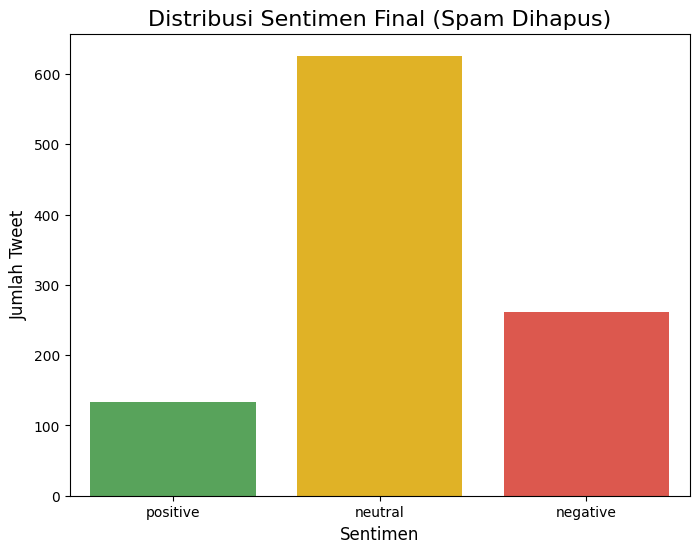

File hasil akhir (FINAL) berhasil disimpan di: /content/drive/My Drive/pemrosesan_text/purbaya_ANALISIS_FINAL.csv


In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Tampilkan hitungan sentimen final
print("\n--- Hasil Distribusi Sentimen Final (RoBERTa pada data bersih) ---")
sentiment_counts = df_sentiment['sentiment_label_final'].value_counts()
print(sentiment_counts)

# 2. Buat visualisasi (Bar Plot)
print("\nMembuat plot distribusi sentimen final...")
plt.figure(figsize=(8, 6))

plot_order = ['positive', 'neutral', 'negative']
plot_palette = {'positive': '#4CAF50', 'neutral': '#FFC107', 'negative': '#F44336'}
plot_order_filtered = [l for l in plot_order if l in sentiment_counts.index]

sns.countplot(
    data=df_sentiment,                # <-- Menggunakan df_sentiment
    x='sentiment_label_final',
    order=plot_order_filtered,
    palette=plot_palette,
    hue='sentiment_label_final',
    legend=False
)
plt.title('Distribusi Sentimen Final (Spam Dihapus)', fontsize=16)
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

# 3. Tentukan folder dan path untuk menyimpan plot FINAL
output_dir = '/content/drive/My Drive/pemrosesan_text'
plot_path = os.path.join(output_dir, 'sentiment_distribution_FINAL.png')
os.makedirs(output_dir, exist_ok=True)
plt.savefig(plot_path)

print(f"Plot final berhasil disimpan di: {plot_path}")
plt.show()

# 4. Simpan file CSV hasil akhir
final_output_path = os.path.join(output_dir, 'purbaya_ANALISIS_FINAL.csv')
df_sentiment.to_csv(final_output_path, index=False) # <-- Menggunakan df_sentiment
print(f"File hasil akhir (FINAL) berhasil disimpan di: {final_output_path}")

# BELUM SELESAI PAK BUTUH DI FINE TUNING UNTUK HASIL ANALISISNYA PAK


In [98]:
sentiment_counts = df_sentiment['sentiment_label_final'].value_counts()
print(sentiment_counts)

sentiment_label_final
neutral     626
negative    262
positive    134
Name: count, dtype: int64


In [99]:
# --- Blok 5: Validasi Manual (Audit Model) ---
import pandas as pd

# Pastikan df_sentiment ada
if 'df_sentiment' in locals():
    print("--- Audit Acak: 20 Cuitan yang Diberi Label 'NEGATIVE' oleh Model ---")
    print("Silakan baca 'full_text_no_hashtag' dan nilai sendiri:\n")

    # Ambil semua baris negatif
    negative_tweets = df_sentiment[df_sentiment['sentiment_label_final'] == 'negative']

    # Ambil 20 sampel acak (atau kurang jika tidak ada 20)
    sample_size = min(20, len(negative_tweets))

    if sample_size > 0:
        # Atur pandas agar menampilkan teks lengkap
        pd.set_option('display.max_colwidth', None)

        # Tampilkan kolom-kolom penting
        print(negative_tweets.sample(sample_size)[['full_text_no_hashtag', 'normalized_text']])
    else:
        print("Tidak ditemukan cuitan 'negative' untuk diaudit.")
else:
    print("Error: DataFrame 'df_sentiment' tidak ditemukan.")

--- Audit Acak: 20 Cuitan yang Diberi Label 'NEGATIVE' oleh Model ---
Silakan baca 'full_text_no_hashtag' dan nilai sendiri:

                                                                                                                                                                                                                                                                               full_text_no_hashtag  \
719                                                                                                                                                                                     @AnKiiim_ maaf pak Purbaya saya hanya percaya SPBU asing seperti Shell yang menjual bahan bakar berkualitas   
99                                                              @sabrinaazel Rasanya buzzer buzzer Purbaya mulai aksi memberitakan hal hal seolah olah purbaya seorang hero buktikan saja nanti jangan terpleset lagi untuk kedua kali seperti dulu rakyat memuji Mulyono si pengkhianat kon

In [101]:
import os

print("--- Menyiapkan File untuk Pelabelan Manual ---")

# Pastikan df_sentiment ada dan berisi hasil terakhir
if 'df_sentiment' in locals() and 'sentiment_label_final' in df_sentiment.columns:

    # 1. Pilih kolom-kolom penting untuk pelabelan
    # Kita butuh ID, teks asli, teks bersih, dan label 'salah' dari model
    columns_to_export = [
        'id_str',
        'full_text_no_hashtag',
        'normalized_text',
        'sentiment_label_final' # Label "salah" dari model RoBERTa
    ]

    # 2. Buat DataFrame baru untuk pelabelan
    df_labeling = df_sentiment[columns_to_export].copy()

    # 3. Buat kolom baru untuk Anda isi
    df_labeling['label_manual'] = "" # Kolom ini akan Anda isi

    # 4. Tentukan path penyimpanan di Google Drive
    output_dir = '/content/drive/My Drive/Pemrosesan_text'
    labeling_file_path = os.path.join(output_dir, 'purbaya_UNTUK_LABELING.csv')

    # 5. Simpan ke CSV
    os.makedirs(output_dir, exist_ok=True)
    df_labeling.to_csv(labeling_file_path, index=False)

    print(f"Berhasil!")
    print(f"File '{labeling_file_path}' telah disimpan di Google Drive Anda.")
    print("Silakan buka file tersebut untuk memulai pelabelan manual.")

else:
    print("Error: DataFrame 'df_sentiment' atau 'sentiment_label_final' tidak ditemukan.")
    print("Harap jalankan ulang Blok 1, 2, dan 3 dari langkah sebelumnya.")

--- Menyiapkan File untuk Pelabelan Manual ---
Berhasil!
File '/content/drive/My Drive/Pemrosesan_text/purbaya_UNTUK_LABELING.csv' telah disimpan di Google Drive Anda.
Silakan buka file tersebut untuk memulai pelabelan manual.
